In [1]:
import meanz_modules as mzmod
import rubin_sim
import rubin_sim.maf as maf
from rubin_sim.scheduler.utils import SkyAreaGenerator
from rubin_sim.data import get_baseline

from os import path

opsim_fname = rubin_sim.data.get_baseline()
run_name = path.splitext(path.basename(opsim_fname))[0]
nside=64


In [ ]:
# # Apply the above routine to our baseline sim, and show the plots
bgroup, bd = mzmod.metric_plots(run_name, opsim_fname, year=2,nside=nside)
bgroup.plot_all(closefigs=False)

In [3]:
ilim = [24.1, 25.3]
meanz = [0.92, 1.08]

a,b = mzmod.coeff_solve(ilim,meanz)
print(a,b)

0.044444444444444446 -0.7644444444444444


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Dataset definitions

In [2]:
v33_sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season6v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season6v3.3_10yrs.db',]
v33_name_list = [path.splitext(path.basename(sim))[0] for sim in v33_sim_list]

## In this section, we get maps of the i-band depth across the survey for v3.3 simulations at year=3

In [3]:
# Run our above routine for the v3.3 simulations at year 3
for i in range(len(v33_sim_list)):
    this_run = v33_sim_list[i]
    this_fname = v33_name_list[i]
    bgroup, bd = mzmod.metric_plots(this_fname, this_run, year=3)
    #bgroup.plot_all(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


### In this section, we run our metric calculations at each year for all v3.3 simulations and produce a dataframe to save to disk.

In [17]:
# First define a routine to run across a list of years and produce a dataframe
def get_year_by_year_metrics(year_list, name_list, sim_list):
    import pandas as pd
    overall_names = []
    overall_years = []
    overall_meds = []
    overall_means = []
    overall_std = []
    overall_iqr = []
    overall_meanz = []
    for year in year_list:
        for i in range(len(sim_list)):
            bgroup, bd = mzmod.metric_plots(name_list[i], sim_list[i], year=year)
            overall_names.append(name_list[i])
            overall_years.append(year)
            overall_meds.append(bd[list(bd.keys())[0]].summary_values['Median'])
            overall_means.append(bd[list(bd.keys())[0]].summary_values['Mean'])
            overall_meanz.append(mzmod.mean_z(bd[list(bd.keys())[0]].summary_values['Mean'], num_bins=5)[0])
            overall_std.append(bd[list(bd.keys())[0]].summary_values['Rms'])
            overall_iqr.append(bd[list(bd.keys())[0]].summary_values['75th%ile']-bd[list(bd.keys())[0]].summary_values['25th%ile'])
    df = pd.DataFrame(list(zip(overall_names, overall_years, overall_meds, overall_means, overall_meanz, overall_std, overall_iqr)), 
                  columns=['Strategy', 'Year', 'Median i-band depth', 'Mean i-band depth', 'meanz 1st bin', 'Std i-band depth', 'IQR i-band depth'])
    return df

In [18]:
import numpy as np
import pandas as pd
nums =2
v33_df = get_year_by_year_metrics(np.arange(1,nums+1), v33_name_list[:nums], v33_sim_list[:nums])
display(v33_df)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


,Strategy,Year,Median i-band depth,Mean i-band depth,meanz 1st bin,Std i-band depth,IQR i-band depth
0,baseline_v3.3_10yrs,1,25.252161,25.233240,0.375515,0.184610,0.235948
1,noroll_v3.3_10yrs,1,25.252161,25.233240,0.375515,0.184610,0.235948
2,baseline_v3.3_10yrs,2,25.635288,25.598740,0.392600,0.197662,0.260341
3,noroll_v3.3_10yrs,2,25.626280,25.601309,0.392720,0.170386,0.215176


In [19]:
v33_df.to_pickle('v33_dataframe_withmeanz.pkl')

### Here we plot the year-by-year metric results.  We read in from the dataframe, so if it was already produced, we can skip over the previous chunk of notebook.

In [20]:
v33_df = pd.read_pickle('v33_dataframe_withmeanz.pkl')

In [21]:
# A utility to plot summary stats for strategies as a function of year, given a dataframe from the above routines.
def plot_metric_by_year(df, stat_name, y_axis_label=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    year_vals = np.array(list(set(df['Year'])))
    strategies=list(set(df['Strategy']))
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Offset axes:
    offsets = 0.05*np.arange(0,len(strategies))
    offsets -= np.mean(offsets)
    offset_index = 0

    # y-axis label handling
    if y_axis_label is None:
        y_axis_label = stat_name
        
    ## put in line style stuff
    for s in strategies:
        yvals = np.array(df[stat_name][df['Strategy']==s])
        ax.plot(year_vals+offsets[offset_index], yvals, label=s)
        offset_index += 1
    plt.xlabel('Year')
    plt.ylabel(y_axis_label)
    plt.legend()
    plt.show()

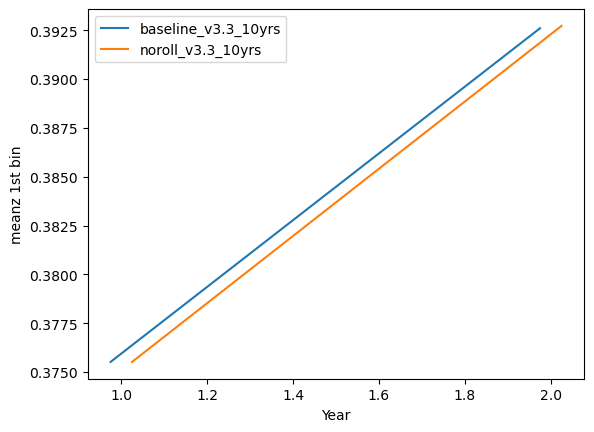

In [22]:
# Plot various quantities using utility routine
#plot_metric_by_year(v33_df, 'Mean i-band depth')
plot_metric_by_year(v33_df, 'meanz 1st bin')
#plot_metric_by_year(v33_df, 'IQR i-band limiting magnitude', 'IQR i-band depth')